# 1. BUSINESS UNDERSTANDING



> Sebuah lending company ingin memberikan berbagai jenis pinjaman kepada para pelanggan. Ketika perusahaan menerima permohonan pinjaman, maka perusahaan harus mengambil keputusan persetujuan pinjaman berdasarkan profil pemohon


> Ada dua resiko yang mungking terjadi :


1.   Jika pemohon memiliki probabilitas yang besar untuk gagal bayar, maka menyetujui pinjaman akan mengakibatkan kerugian yang besar
2.   Jika pemohom memiliki probabilitas yang tinggi untuk membayar pinjaman, maka menolak permohonan pinjaman akan mengakibatkan kerugian bisnis bagi perusahaan

> Oleh karena itu perusahaan bertujuan untuk membangun sebuah model machine learning yang mampu memprediksi resiko kredit dengan harapan dapat meningkatkan efisiensi proses penilaian resiko kredit dengan otomatisasi serta meningkatkan profitabilitas perusahaan

> Adapun data yang diberikan merupakan data peminjam sebelumnya baik yang diterima maupun tidak. Data terdiri dari 74 kolom. yaitu :


# 2. EXPLORING DATA

In [56]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/BELAJAR DATA SCIENCE/FINAL TASK'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/BELAJAR DATA SCIENCE/FINAL TASK


In [3]:
data = pd.read_csv("loan_data_2007_2014.csv")

In [4]:
data.shape

(466285, 75)

In [5]:
# check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
data.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Memeriksa data duplikat
duplicated_rows = data.duplicated()
print(duplicated_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Length: 466285, dtype: bool


terlihat bahwa tidak ada data yang duplikat

In [8]:
# membuang fitur yang nilainya unik semua, free text, dan kolom yang tidak dibutuhkan
columns_to_drop = ['Unnamed: 0','id', 'member_id', 'url', 'desc', 'sub_grade']
data.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
# mengecek feature yang kosong dan konstan
constant_features = data.columns[data.nunique() == 1]
empty_features = data.columns[data.isnull().all()]
print("Fitur Konstan:", constant_features)
print("Fitur Kosong:", empty_features)

Fitur Konstan: Index(['policy_code', 'application_type'], dtype='object')
Fitur Kosong: Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')


In [10]:
# menghapus fitur yang kosong semua dan konstan
features_to_drop = set(constant_features).union(set(empty_features))
data.drop(columns=features_to_drop, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_title                    438697 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

Define target variabel :

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap kemampuan suatu individu dalam mempengaruhi pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel `loan_status` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [12]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat variable loan_status memiliki beberapa nilai :
`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` (peminjam yang buruk) atau `good loan` (peminjam yang baik)

In [13]:
# Menyiapkan target feature
data['bad_flag'] = np.where(data.loc[:, 'loan_status'].isin(['Fully Paid', 'Current', 'In Grace Period']), 0, 1)

In [14]:
data['bad_flag'].value_counts(normalize=True)*100

0    88.381784
1    11.618216
Name: bad_flag, dtype: float64

Setelah melakukan flagging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan imbalanced dataset.

In [15]:
# membuang kolom asal (loan status)
data.drop('loan_status', axis=1, inplace=True)

modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modelling

In [16]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [18]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [19]:
data.drop('emp_length', axis=1, inplace=True)

In [20]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [22]:
data.drop('term', axis=1, inplace=True)

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [23]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [24]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [25]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [27]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [28]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [29]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [30]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [31]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [32]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [33]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [34]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [35]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [37]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [38]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [39]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# 3. EXPLORATORY DATA ANALYSIS

##correlation check

<Axes: >

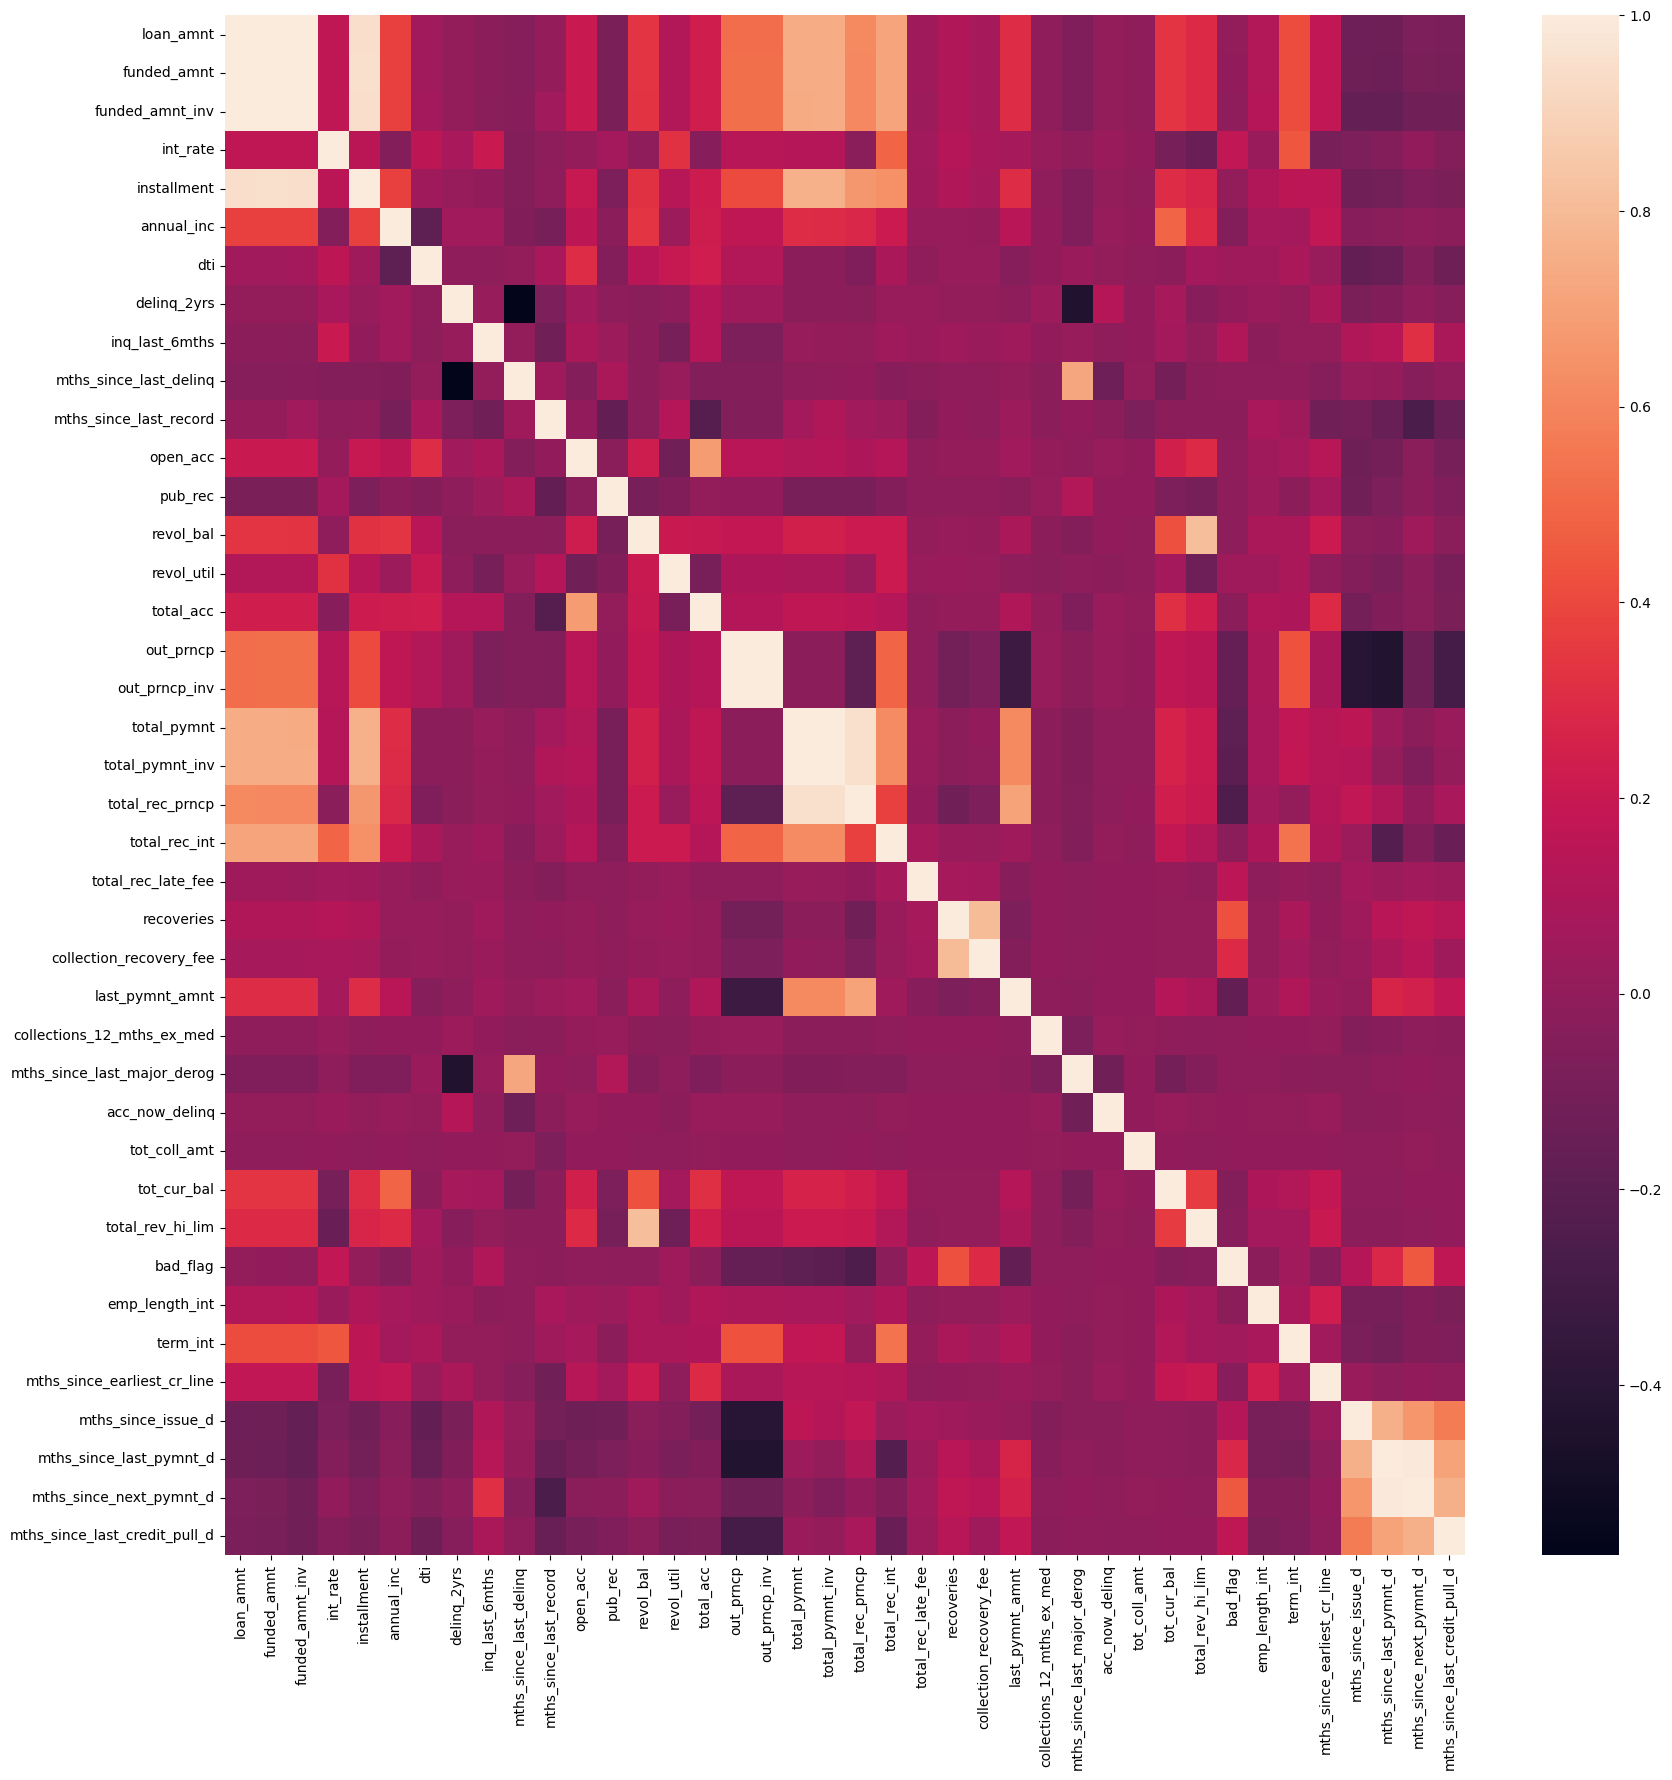

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [41]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [42]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [43]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

In [44]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
initial_list_status         2
dtype: int64

# 4. DATA PREPROCESSING & FEATURE ENGINEERING

handling missing value

In [45]:
# Mengisi nilai yang hilang
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)
data.fillna(data.mean(), inplace=True)

# 5. FEATURE SCALING & TRANSFORMATION

##one hot encoding

In [46]:
# Mengubah variabel kategori menjadi vektor
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data.head(3)

,loan_amnt,int_rate,grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,...,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,10.65,1,205475,5,24000.0,2,0,1,8851,...,0.00,0.0,0.0,0.0,0.0,0,10.0,36.0,395.0,72.0
1,2500,15.27,2,131796,5,30000.0,1,0,0,49816,...,117.08,0.0,0.0,0.0,0.0,1,0.0,60.0,224.0,72.0
2,2400,15.96,2,205475,5,12252.0,0,0,11,60661,...,0.00,0.0,0.0,0.0,0.0,0,10.0,36.0,193.0,72.0


##standardization

In [47]:
# Ambil kolom kategorikal dan kolom numerik
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

# Standarisasi nilai numerik
ss = StandardScaler()
std_numerical = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

# Menggabungkan DataFrame standar numerik dengan DataFrame asli berdasarkan indeksnya
data[numerical_cols] = std_numerical

##imbalanced dataset

In [48]:
X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

# Menangani imbalanced class (oversampling)
y.value_counts()

0    412111
1     54174
Name: bad_flag, dtype: int64

In [49]:
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)
y.value_counts()

0    412111
1    412111
Name: bad_flag, dtype: int64

In [50]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, X_test.shape

((659377, 34), (164845, 34))

# 6. MODELLING

In [53]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [54]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
25,recoveries,4.326277e-01
23,out_prncp,1.986419e-01
2,grade,9.203892e-02
1,int_rate,8.365083e-02
24,total_rec_late_fee,7.553725e-02
33,mths_since_issue_d,3.430143e-02
29,tot_cur_bal,1.983661e-02
14,inq_last_6mths,1.865374e-02
5,annual_inc,1.114562e-02
31,term_int,7.234534e-03


# 7. MODEL EVALUATION

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [55]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

AUC

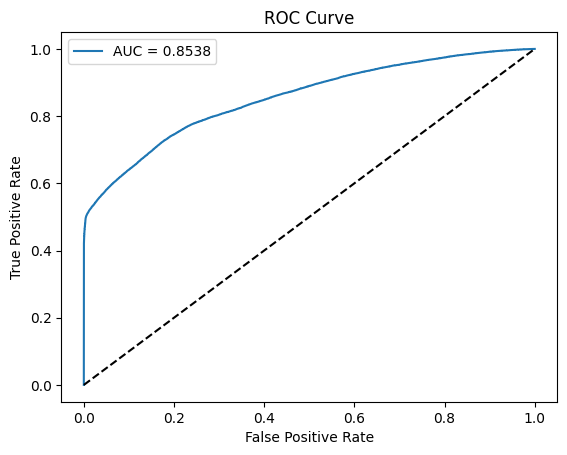

In [57]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

KS

In [58]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [59]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,231171,0,0.208580,1,0,1,0.000006,0.0,0.000012
1,289877,0,0.208877,2,0,2,0.000012,0.0,0.000024
2,258506,0,0.208994,3,0,3,0.000018,0.0,0.000036
3,308460,0,0.209165,4,0,4,0.000024,0.0,0.000049
4,310566,0,0.209216,5,0,5,0.000030,0.0,0.000061


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5494')

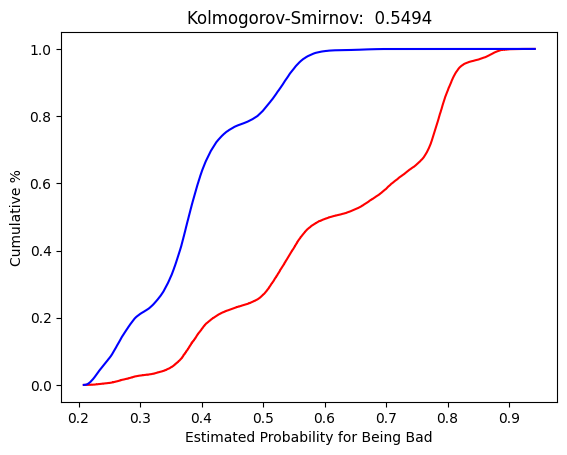

In [60]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.8538` dan `KS = 0.54`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.